# Problem statement : Predict the performance of vehicle 

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [92]:
df = pd.read_csv('Datasets/vehicle performance prediction.csv')
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [93]:
df.dtypes

origin                   int64
cylinders                int64
displacement           float64
horsepower              object
weight                   int64
acceleration           float64
year                     int64
name                    object
Kilometer_per_liter    float64
dtype: object

In [94]:
df.shape

(398, 9)

In [95]:
df.columns

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'name', 'Kilometer_per_liter'],
      dtype='object')

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [97]:
df.describe()

,origin,cylinders,displacement,weight,acceleration,year,Kilometer_per_liter
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,1.572864,5.454774,193.425879,2970.424623,15.568090,1976.010050,9.997073
std,0.802055,1.701004,104.269838,846.841774,2.757689,3.697627,3.322917
min,1.000000,3.000000,68.000000,1613.000000,8.000000,1970.000000,3.826293
25%,1.000000,4.000000,104.250000,2223.750000,13.825000,1973.000000,7.440015
50%,1.000000,4.000000,148.500000,2803.500000,15.500000,1976.000000,9.778305
75%,2.000000,8.000000,262.000000,3608.000000,17.175000,1979.000000,12.329168
max,3.000000,8.000000,455.000000,5140.000000,24.800000,1982.000000,19.811697


In [98]:
df.isnull().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

In [99]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [100]:
df['horsepower']=df['horsepower'].replace('?',np.NaN)
df['horsepower'] = df['horsepower'].astype(float)
df['horsepower']=df['horsepower'].replace(np.NaN,df['horsepower'].median())

#df['horsepower'] = df['horsepower'].replace('?', np.NaN).astype(float).fillna(df['horsepower'].median())

In [101]:
df['origin']= df['origin'].astype('object')

In [102]:
df[['manufacturer', 'model']] = df['name'].str.split(' ', 1, expand=True)
df.drop('name',inplace=True,axis=1)

In [103]:
df.dtypes

origin                  object
cylinders                int64
displacement           float64
horsepower             float64
weight                   int64
acceleration           float64
year                     int64
Kilometer_per_liter    float64
manufacturer            object
model                   object
dtype: object

In [104]:
df['manufacturer'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [105]:
df['manufacturer'].value_counts()

ford             51
chevrolet        43
plymouth         31
amc              28
dodge            28
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
mazda            10
oldsmobile       10
fiat              8
peugeot           8
audi              7
chrysler          6
vw                6
volvo             6
renault           5
saab              4
subaru            4
opel              4
chevy             3
bmw               2
cadillac          2
maxda             2
mercedes-benz     2
triumph           1
vokswagen         1
mercedes          1
hi                1
capri             1
chevroelt         1
toyouta           1
nissan            1
Name: manufacturer, dtype: int64

In [106]:
corrections = {
    'chevroelt': 'chevrolet',
    'chevy': 'chevrolet',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen',
    'maxda': 'mazda',
    'mercedes-benz':'mercedes' ,
}

df['manufacturer'] = df['manufacturer'].replace(corrections)
len(df['manufacturer'].unique())

30

In [107]:
df['model'].nunique()

299

In [108]:
df['model'].unique()

array(['chevelle malibu', 'skylark 320', 'satellite', 'rebel sst',
       'torino', 'galaxie 500', 'impala', 'fury iii', 'catalina',
       'ambassador dpl', 'challenger se', "'cuda 340", 'monte carlo',
       'estate wagon (sw)', 'corona mark ii', 'duster', 'hornet',
       'maverick', 'pl510', '1131 deluxe sedan', '504', '100 ls', '99e',
       '2002', 'gremlin', 'f250', 'c20', 'd200', '1200d', 'vega 2300',
       'corona', 'pinto', 'satellite custom', 'torino 500', 'matador',
       'catalina brougham', 'monaco (sw)', 'country squire (sw)',
       'safari (sw)', 'hornet sportabout (sw)', 'vega (sw)', 'firebird',
       'mustang', 'capri 2000', '1900', '304', '124b', 'corolla 1200',
       '1200', 'model 111', 'cricket', 'corona hardtop', 'colt hardtop',
       'type 3', 'vega', 'pinto runabout', 'ambassador sst', 'marquis',
       'lesabre custom', 'delta 88 royale', 'newport royal', 'rx2 coupe',
       'matador (sw)', 'chevelle concours (sw)', 'gran torino (sw)',
       'satellite 

In [109]:
df['model'] = df['model'].str.replace(r'[^a-zA-Z0-9\s]', '')

In [110]:
df.describe(exclude='number')

,origin,manufacturer,model
count,398,398,396
unique,3,30,296
top,1,ford,pinto
freq,249,51,6


<Figure size 2000x1000 with 0 Axes>

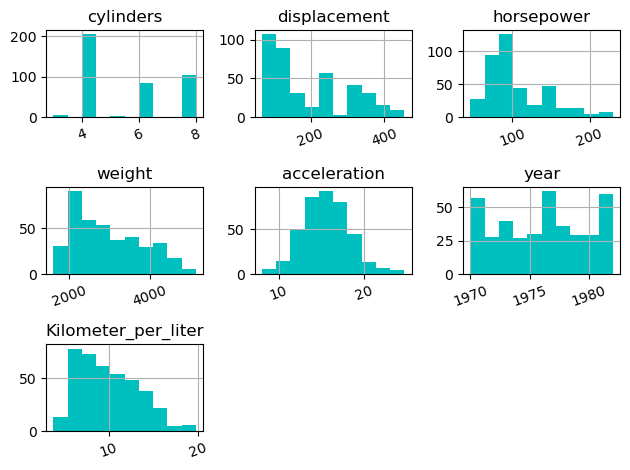

In [111]:
plt.figure(figsize=(20,10))
df.hist(color='c',xrot=20)
plt.tight_layout()

In [112]:
df['Kilometer_per_liter'].describe()

count    398.000000
mean       9.997073
std        3.322917
min        3.826293
25%        7.440015
50%        9.778305
75%       12.329168
max       19.811697
Name: Kilometer_per_liter, dtype: float64

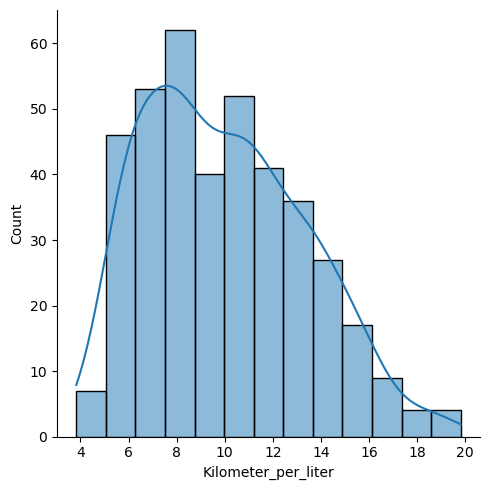

In [113]:
sns.displot(df['Kilometer_per_liter'], kde=True)
plt.show()

In [114]:
df['Kilometer_per_liter'].skew()

0.4570663438355477

## Approach 1 - Drop model, consider manufacturer and origin

In [115]:
df1 = df.copy()

In [26]:
df.drop('model',axis=1,inplace=True)

In [27]:
df_categorical_features = df.select_dtypes(include='object').columns
df_approach1 = pd.get_dummies(df,columns=df_categorical_features)

In [28]:
X = df_approach1.drop('Kilometer_per_liter',axis=1)
y = df['Kilometer_per_liter']

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [31]:
model1 = LinearRegression()
model1.fit(X_train,y_train)
print('Train - ', model1.score(X_train,y_train))
print('Test - ', model1.score(X_test,y_test))

Train -  0.8392174573806594
Test -  0.8272089486381995


# Approach 2 - Drop model, consider only origin

In [33]:
df_approach2 = pd.get_dummies(df,columns=['origin'])

In [34]:
X = df_approach2.drop(['Kilometer_per_liter','manufacturer'],axis=1)
y = df['Kilometer_per_liter']

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [36]:
model2 = LinearRegression()
model2.fit(X_train,y_train)
print('Train - ', model2.score(X_train,y_train))
print('Test - ', model2.score(X_test,y_test))

Train -  0.8141025501508695
Test -  0.8433135133439608


# Approach 3 - Log transformation with approach 1

In [38]:
df_approach3 = df.copy()

In [39]:
df_approach3['log_Kilometer_per_liter'] = df_approach3['Kilometer_per_liter'].apply(lambda x: np.log(x))

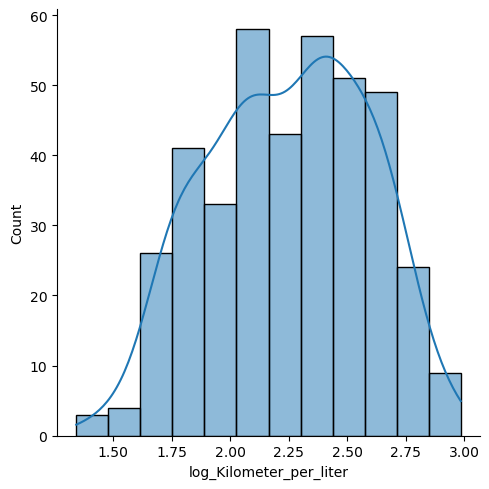

In [40]:
sns.displot(df_approach3['log_Kilometer_per_liter'], kde=True)
plt.show()

In [41]:
df_approach3['log_Kilometer_per_liter'].skew()

-0.13649360910230762

In [42]:
df_approach3.drop('Kilometer_per_liter',axis=1,inplace=True)

In [43]:
df_categorical_features = df.select_dtypes(include='object').columns
df_approach3 = pd.get_dummies(df_approach3,columns=df_categorical_features)

In [46]:
X = df_approach3.drop('log_Kilometer_per_liter',axis=1)
y = df_approach3['log_Kilometer_per_liter']

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [48]:
model3 = LinearRegression()
model3.fit(X_train,y_train)
print('Train - ', model3.score(X_train,y_train))
print('Test - ', model3.score(X_test,y_test))

Train -  0.8948446977402745
Test -  0.884372484777505


# Approach 4 - Log tranformation with approach 2

In [49]:
df_approach4 = df.copy()

In [50]:
df_approach4['log_Kilometer_per_liter'] = df_approach4['Kilometer_per_liter'].apply(lambda x: np.log(x))

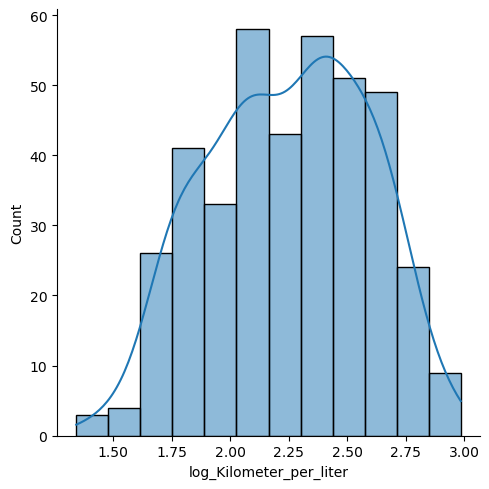

In [51]:
sns.displot(df_approach4['log_Kilometer_per_liter'], kde=True)
plt.show()

In [52]:
df_approach4['log_Kilometer_per_liter'].skew()

-0.13649360910230762

In [54]:
df_approach4.drop('Kilometer_per_liter',axis=1,inplace=True)

In [55]:
df_approach4 = pd.get_dummies(df_approach4,columns=['origin'])

In [56]:
X = df_approach4.drop(['log_Kilometer_per_liter','manufacturer'],axis=1)
y = df_approach4['log_Kilometer_per_liter']

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [58]:
model4 = LinearRegression()
model4.fit(X_train,y_train)
print('Train - ', model4.score(X_train,y_train))
print('Test - ', model4.score(X_test,y_test))

Train -  0.8754833909857909
Test -  0.8926765698625566


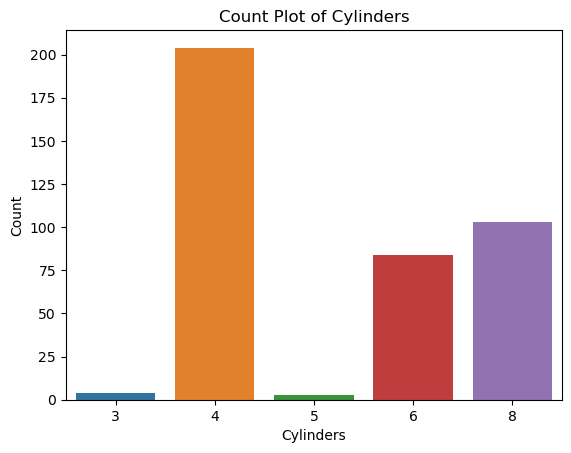

In [61]:
sns.countplot(x='cylinders', data=df)
plt.xlabel('Cylinders')
plt.ylabel('Count')
plt.title('Count Plot of Cylinders')
plt.show()

In [66]:
df['cylinders'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [64]:
df['cylinders'] = df['cylinders'].astype('object')

In [68]:
df['year'].value_counts()

1973    40
1978    36
1976    34
1982    31
1975    30
1970    29
1979    29
1980    29
1981    29
1971    28
1972    28
1977    28
1974    27
Name: year, dtype: int64

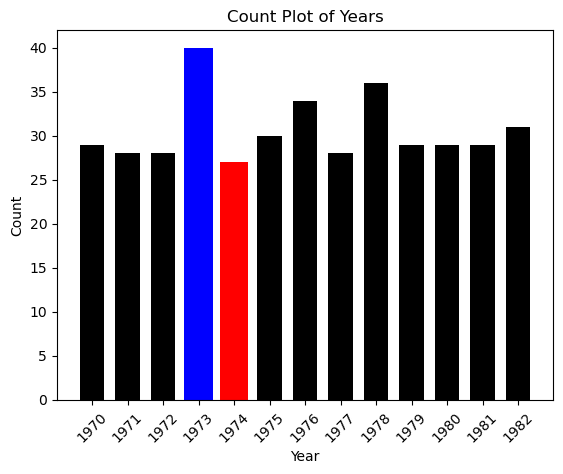

In [76]:
max_count = df['year'].value_counts().max()
min_count = df['year'].value_counts().min()

# Create the count plot with customized colors
sns.countplot(x='year', data=df, color='black', width=0.7)

# Highlight the bars with maximum and minimum counts
for index, value in enumerate(df['year'].value_counts().sort_index()):
    if value == max_count:
        plt.bar(index, value, color='blue')
    elif value == min_count:
        plt.bar(index, value, color='red')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count Plot of Years')
plt.xticks(rotation=45)

# Show the plot
plt.show()

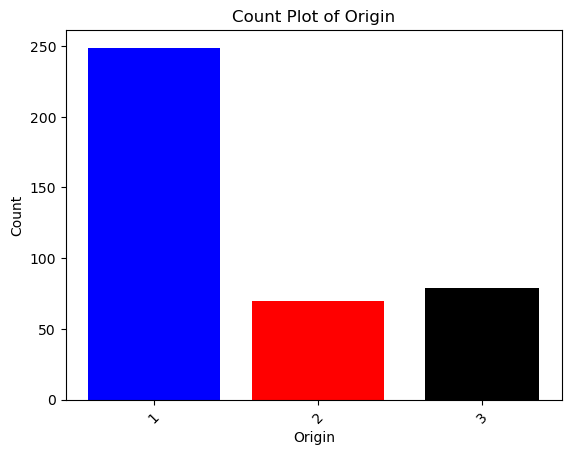

In [77]:
max_count = df['origin'].value_counts().max()
min_count = df['origin'].value_counts().min()

# Create the count plot with customized colors
sns.countplot(x='origin', data=df, color='black', width=0.7)

# Highlight the bars with maximum and minimum counts
for index, value in enumerate(df['origin'].value_counts().sort_index()):
    if value == max_count:
        plt.bar(index, value, color='blue')
    elif value == min_count:
        plt.bar(index, value, color='red')

# Add labels and title
plt.xlabel('Origin')
plt.ylabel('Count')
plt.title('Count Plot of Origin')
plt.xticks(rotation=45)

# Show the plot
plt.show()

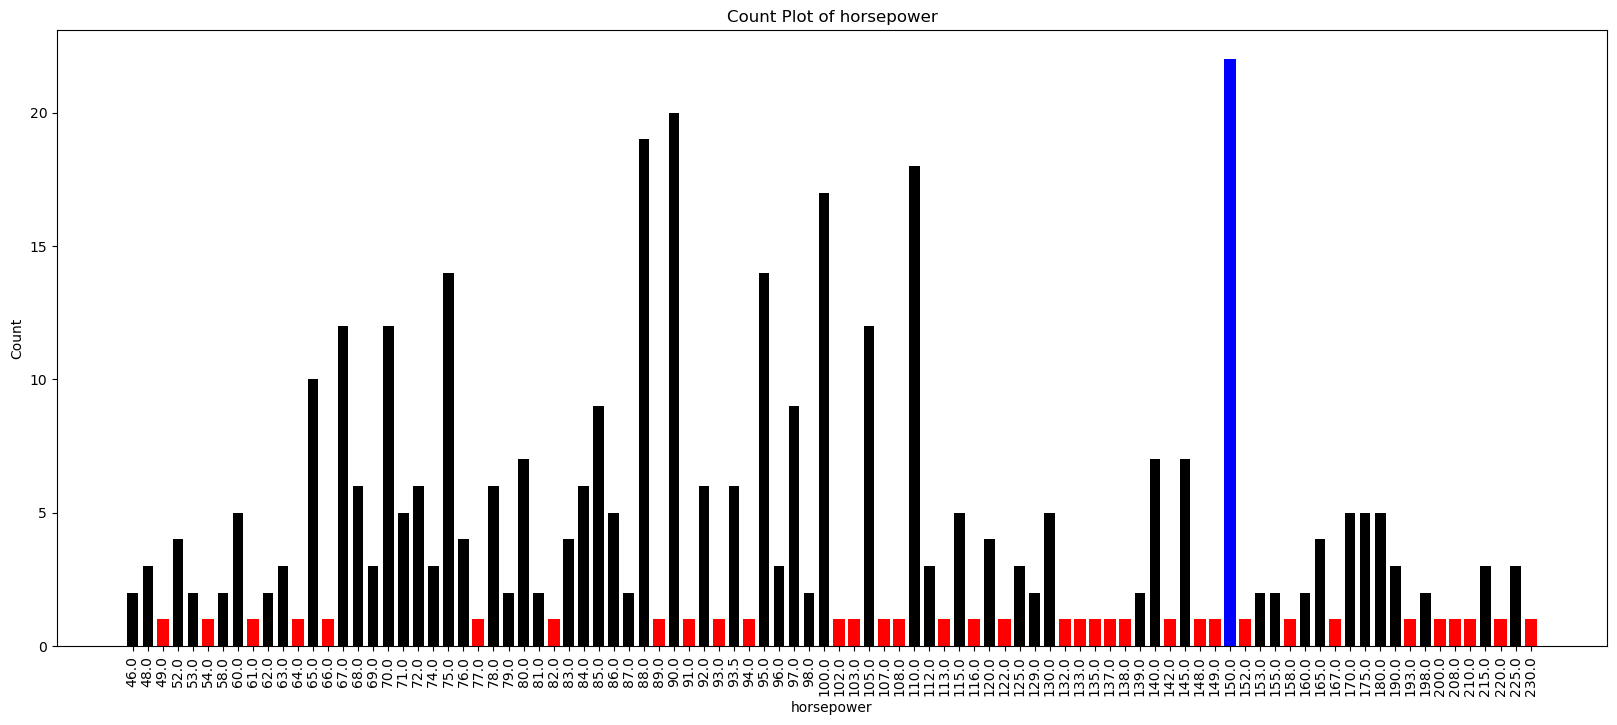

In [81]:
max_count = df['horsepower'].value_counts().max()
min_count = df['horsepower'].value_counts().min()
plt.figure(figsize=(20, 8))
# Create the count plot with customized colors
sns.countplot(x='horsepower', data=df, color='black', width=0.7)

# Highlight the bars with maximum and minimum counts
for index, value in enumerate(df['horsepower'].value_counts().sort_index()):
    if value == max_count:
        plt.bar(index, value, color='blue')
    elif value == min_count:
        plt.bar(index, value, color='red')

# Add labels and title
plt.xlabel('horsepower')
plt.ylabel('Count')
plt.title('Count Plot of horsepower')
plt.xticks(rotation=90)

# Show the plot
plt.show()

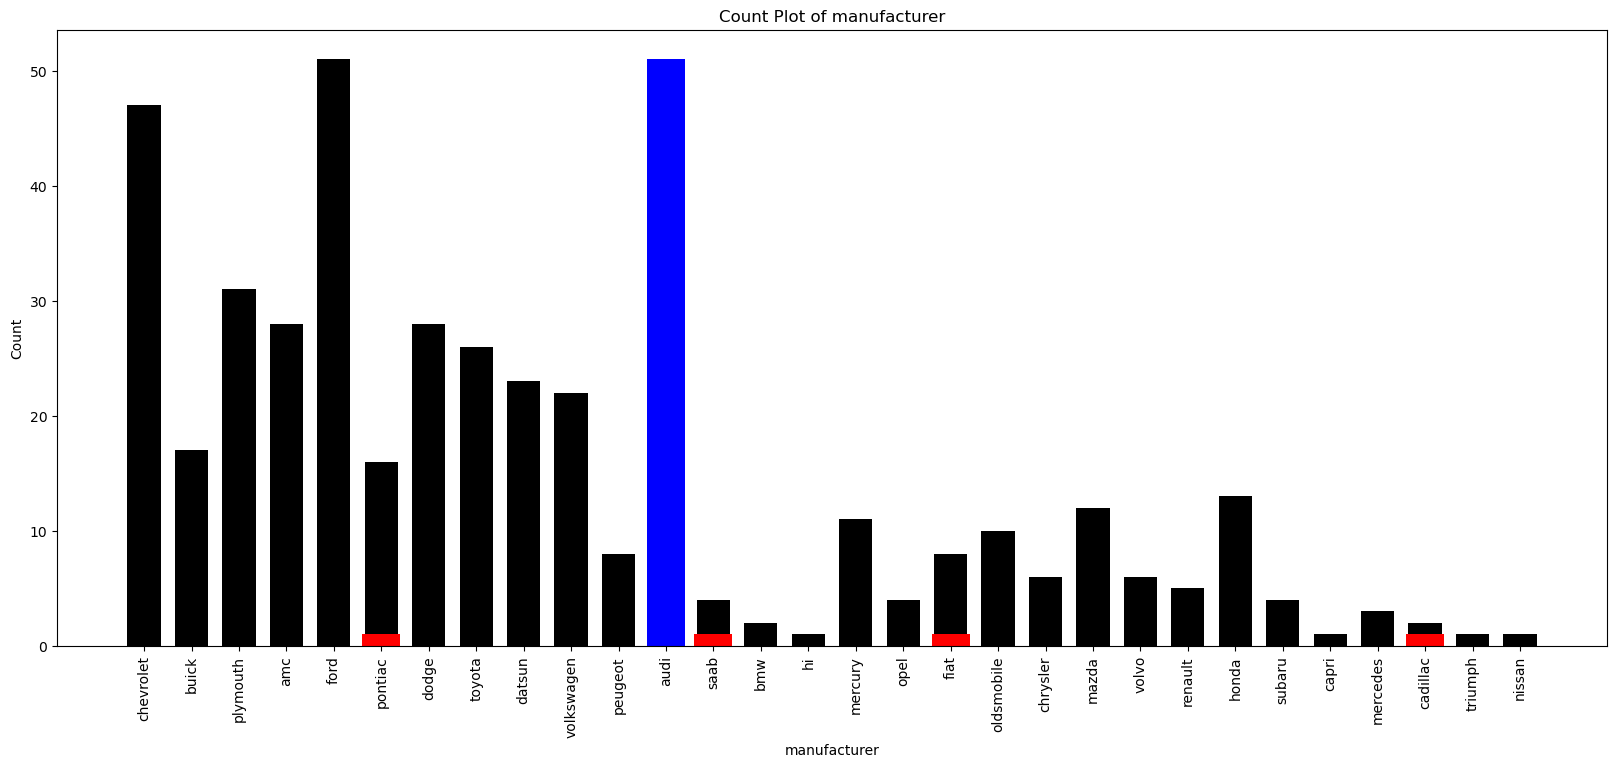

In [83]:
max_count = df['manufacturer'].value_counts().max()
min_count = df['manufacturer'].value_counts().min()

# Create the count plot with customized colors
sns.countplot(x='manufacturer', data=df, color='black', width=0.7)

# Highlight the bars with maximum and minimum counts
for index, value in enumerate(df['manufacturer'].value_counts().sort_index()):
    if value == max_count:
        plt.bar(index, value, color='blue')
    elif value == min_count:
        plt.bar(index, value, color='red')

# Add labels and title
plt.xlabel('manufacturer')
plt.ylabel('Count')
plt.title('Count Plot of manufacturer')
plt.xticks(rotation=45)

# Show the plot
plt.show()

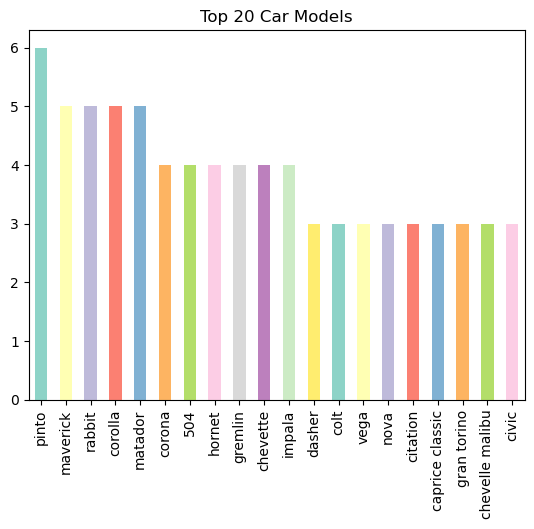

In [116]:
df1['model'].value_counts().nlargest(20).plot(kind='bar', color=sns.color_palette('Set3', n_colors=20))
plt.title('Top 20 Car Models')
plt.show()

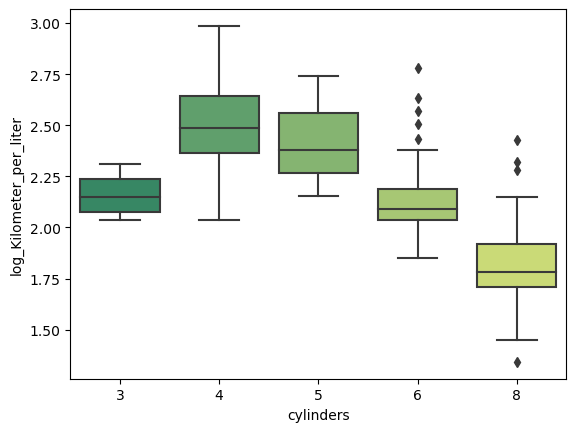

In [123]:
sns.boxplot(df_approach3,x = 'cylinders' , y = 'log_Kilometer_per_liter',palette = 'summer')

plt.show()

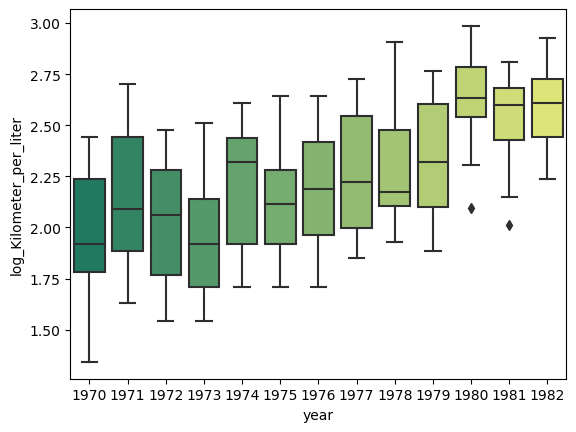

In [124]:
sns.boxplot(df_approach3,x = 'year' , y = 'log_Kilometer_per_liter',palette = 'summer')

plt.show()

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'Kilometer_per_liter', 'manufacturer', 'model'],
      dtype='object')

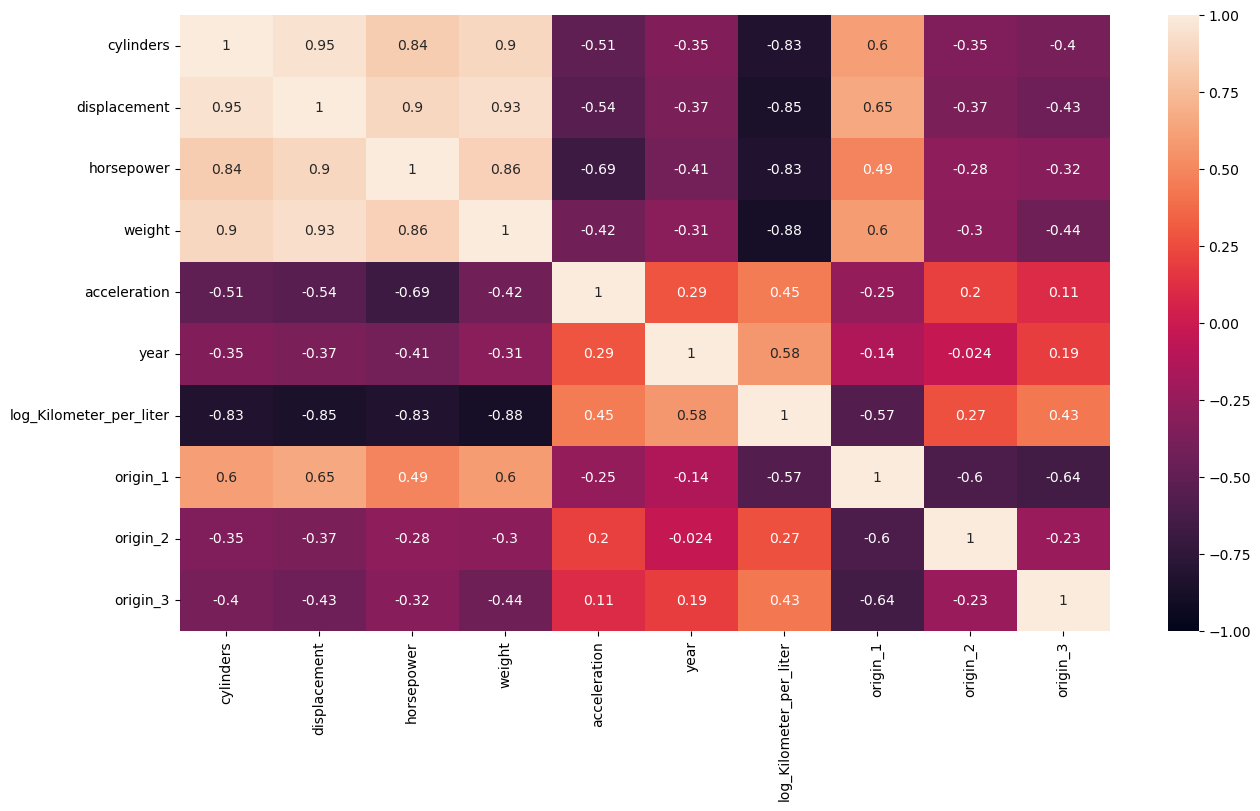

In [135]:
corr = df_approach4.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True,vmin=-1.0,vmax=1.0)
df.columns

In [126]:
df_new = df_approach4.drop(['displacement','weight'],axis=1)

In [129]:
df_new.columns

Index(['cylinders', 'horsepower', 'acceleration', 'year', 'manufacturer',
       'log_Kilometer_per_liter', 'origin_1', 'origin_2', 'origin_3'],
      dtype='object')

In [132]:
df_new = pd.get_dummies(df_new,columns=['manufacturer'])

In [133]:
X = df_new.drop('log_Kilometer_per_liter',axis=1)
y = df_new['log_Kilometer_per_liter']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [134]:
model5 = LinearRegression()
model5.fit(X_train,y_train)
print('Train - ', model5.score(X_train,y_train))
print('Test - ', model5.score(X_test,y_test))

Train -  0.8604580874080989
Test -  0.8419134404706187


In [137]:
df_new1 = df_approach4.drop(['displacement','weight','manufacturer'],axis=1)

In [138]:
df_new1.columns

Index(['cylinders', 'horsepower', 'acceleration', 'year',
       'log_Kilometer_per_liter', 'origin_1', 'origin_2', 'origin_3'],
      dtype='object')

In [139]:
X = df_new1.drop('log_Kilometer_per_liter',axis=1)
y = df_new1['log_Kilometer_per_liter']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [140]:
model6 = LinearRegression()
model6.fit(X_train,y_train)
print('Train - ', model6.score(X_train,y_train))
print('Test - ', model6.score(X_test,y_test))

Train -  0.8304642566951962
Test -  0.8498279816191235


In [142]:
from sklearn.linear_model import SGDRegressor

In [179]:
model7 = SGDRegressor(alpha=0.1)
model7.fit(X_train, y_train)
print('Train - ', model7.score(X_train,y_train))
print('Test - ', model7.score(X_test,y_test))

Train -  -1.4018682842826946e+31
Test -  -1.4284482669163173e+31
